In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

main_directory = r'C:\Users\ASUS\Desktop\ML-data science\DataIncubator\yelp-cleaners' + '\\'
processed_data_directory = main_directory + r'data\processed data' + '\\'

In [304]:
business_df_latest = pd.read_csv(processed_data_directory + 'business_df_latest_inspection.csv')
business_df = pd.read_csv(processed_data_directory + 'business_df.csv')
review_df = pd.read_csv(processed_data_directory + 'review_df.csv')

In [2]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer, HashingVectorizer
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor, LogisticRegression
from sklearn import datasets, tree, utils
from sklearn import model_selection, ensemble
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.preprocessing import MinMaxScaler
from collections import Counter, OrderedDict

In [3]:
import spacy
# nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS = STOP_WORDS.union({'ll', 've'})
from sklearn.naive_bayes import MultinomialNB, GaussianNB

# regression from other features

## getting more features

In [462]:
business_df

,business_id,name,address,latitude,longitude,stars,review_count,is_open,attributes,categories,Inspection Date,Score
0,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",30.234533,-97.877262,4.5,395,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...",2019-05-10,76.0
1,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",30.234533,-97.877262,4.5,395,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...",2019-08-22,81.0
2,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",30.234533,-97.877262,4.5,395,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...",2020-01-07,78.0
3,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",30.234533,-97.877262,4.5,395,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...",2020-06-09,70.0
4,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",30.234533,-97.877262,4.5,395,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...",2021-04-26,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11358,io_UQS_WwonlCPCfKy3Hdw,Super Bowl,"719 W William Cannon Dr, Ste 103",30.196750,-97.788452,3.5,214,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Chinese",2020-04-13,81.0
11359,io_UQS_WwonlCPCfKy3Hdw,Super Bowl,"719 W William Cannon Dr, Ste 103",30.196750,-97.788452,3.5,214,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Chinese",2020-08-24,72.0
11360,EaBDXdIQ_TeeUhn1Twnjvg,Shanghai Noodle House,"10300 Anderson Mill Rd, Ste A",30.447543,-97.804432,3.5,83,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Bubble Tea, Coffee & Tea, Food, N...",2019-11-19,73.0
11361,EaBDXdIQ_TeeUhn1Twnjvg,Shanghai Noodle House,"10300 Anderson Mill Rd, Ste A",30.447543,-97.804432,3.5,83,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Bubble Tea, Coffee & Tea, Food, N...",2020-05-05,85.0


In [461]:
business_df['attributes']

0        {'Ambience': "{'touristy': False, 'hipster': F...
1        {'Ambience': "{'touristy': False, 'hipster': F...
2        {'Ambience': "{'touristy': False, 'hipster': F...
3        {'Ambience': "{'touristy': False, 'hipster': F...
4        {'Ambience': "{'touristy': False, 'hipster': F...
                               ...                        
11358    {'RestaurantsGoodForGroups': 'True', 'Alcohol'...
11359    {'RestaurantsGoodForGroups': 'True', 'Alcohol'...
11360    {'RestaurantsAttire': "u'casual'", 'Restaurant...
11361    {'RestaurantsAttire': "u'casual'", 'Restaurant...
11362    {'RestaurantsAttire': "u'casual'", 'Restaurant...
Name: attributes, Length: 11363, dtype: object

## regression on review scores

In [231]:
# df = pd.read_csv(processed_data_directory + 'reviews_nearest_score_no_limit_df.csv')
df = pd.read_csv(processed_data_directory + 'reviews_nearest_score_2_years_df.csv')

(array([ 14.,  59., 105., 168., 190., 220., 202., 201., 235., 226., 169.,
        196., 226., 173., 158., 133., 239., 107., 143., 142., 111.,  94.,
         87., 105.,  96., 215.,  72.,  74.,  82.,  82.,  59.,  66.,  38.,
        114.,  33.,  39.,  26.,  48.,  41.,  32.,  54.,  17.,  21.,  21.,
         48.,   7.,  21.,   0.,  36.,  16.]),
 array([0.01884835, 0.0380673 , 0.05728625, 0.07650521, 0.09572416,
        0.11494311, 0.13416206, 0.15338101, 0.17259996, 0.19181891,
        0.21103786, 0.23025681, 0.24947576, 0.26869471, 0.28791367,
        0.30713262, 0.32635157, 0.34557052, 0.36478947, 0.38400842,
        0.40322737, 0.42244632, 0.44166527, 0.46088422, 0.48010317,
        0.49932213, 0.51854108, 0.53776003, 0.55697898, 0.57619793,
        0.59541688, 0.61463583, 0.63385478, 0.65307373, 0.67229268,
        0.69151163, 0.71073058, 0.72994954, 0.74916849, 0.76838744,
        0.78760639, 0.80682534, 0.82604429, 0.84526324, 0.86448219,
        0.88370114, 0.90292009, 0.92213904, 0.

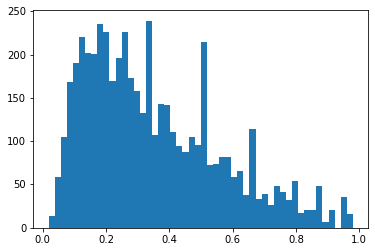

In [283]:
plt.hist(dfb.err_review,bins=50)

In [284]:
# treat each inspection as a separate observation to increase data
gb = df.groupby(['business_id','Score'])
counts = gb.size().to_frame(name='num_reviews')
dfb = (counts
.join(gb.agg({'review_stars': 'mean'}).rename(columns={'review_stars': 'avg_review'}))
.join(gb.agg({'review_stars': 'sem'}).rename(columns={'review_stars': 'err_review'}))
.join(gb.agg({'stars': 'mean'}).rename(columns={'stars': 'business_stars'}))
.join(gb.agg({'text': ' '.join}))
.reset_index()
)
dfb=dfb.fillna({'err_review':1.0}) # give big error bar if there's only 1 review
dfb=dfb[(dfb['err_review']<0.99)&(dfb['err_review'] > 0.01)]

In [459]:
dfb

,business_id,Score,num_reviews,avg_review,err_review,business_stars,text
0,-0TbQsmE2p1bhG30rgvK2Q,93.0,7,3.571429,0.611678,4.0,Great beer selection. But this isn't a food ma...
3,-4bP1UUgpZumIu6DZMaMzw,86.0,60,3.783333,0.156031,4.0,They have very good coffee and interesting com...
4,-4bP1UUgpZumIu6DZMaMzw,95.0,5,3.800000,0.583095,4.0,Houndstooth has always been fantastic! The bar...
7,-4cQ12xutjNLW-tPI06_tg,94.0,18,3.777778,0.328947,3.5,i was about to give this place 4 stars but not...
8,-4cQ12xutjNLW-tPI06_tg,96.0,3,2.333333,0.881917,3.5,The food is good. Tacos are amazing. You never...
...,...,...,...,...,...,...,...
6582,zlPKCqb9sfkhIW27sAGsIA,93.0,13,3.923077,0.473145,3.5,Great local bar! If you're visiting for ACL or...
6583,zo-POOSRX0wiVJlJyvujyA,100.0,36,4.194444,0.217560,4.0,If I could give this location no stars I would...
6584,zr40jIjFDIcZ3dzbSK53Ww,84.0,15,3.600000,0.411733,3.5,The food is good but customer service is defin...
6585,zr40jIjFDIcZ3dzbSK53Ww,93.0,28,3.178571,0.291201,3.5,Horrible service! The Cashier was rude and for...


In [463]:
dfb.num_reviews

0        7
3       60
4        5
7       18
8        3
        ..
6582    13
6583    36
6584    15
6585    28
6586    91
Name: num_reviews, Length: 5061, dtype: int64

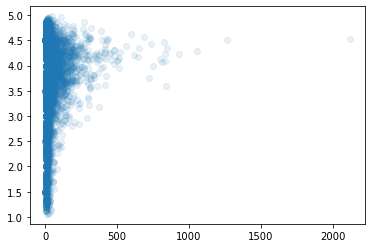

In [460]:
plt.scatter(dfb.num_reviews, dfb.avg_review,alpha=0.1)

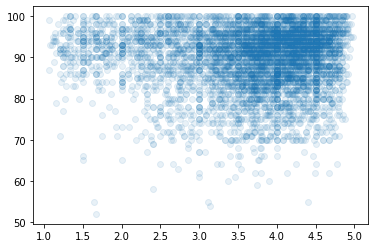

In [449]:
plt.scatter(dfb.avg_review, dfb.Score,alpha=0.1)

In [455]:
def roundby(num, nearest):
    return round(num/nearest)*nearest
def plot_score_by_stars(df,col_name='avg_review'):
    df[col_name] = df[col_name].apply(lambda x: roundby(x,0.1))
    score_by_stars = df.groupby(col_name).agg(
        mean_Score=('Score', 'mean'),
        err_Score=('Score', 'sem'),
    )
    return score_by_stars

In [456]:
df_all_data = plot_score_by_stars(dfb[['avg_review','Score']].copy()) # raw data
df_business_stars = plot_score_by_stars(dfb[['business_stars','Score']].copy(),col_name='business_stars') # raw data

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0.5, 0, 'Average Review (out of 5 stars)')

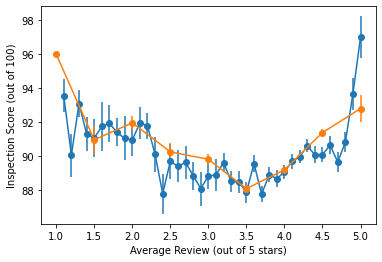

In [457]:
df_all_data = plot_score_by_stars(dfb[['avg_review','Score']].copy()) # raw data
plt.errorbar(x=df_all_data.index,
             y=df_all_data.mean_Score,
             yerr=df_all_data.err_Score,
             marker='o')
df_business_stars = plot_score_by_stars(dfb[['business_stars','Score']].copy(),col_name='business_stars') # raw data
plt.errorbar(x=df_business_stars.index,
             y=df_business_stars.mean_Score,
             yerr=df_business_stars.err_Score,
             marker='o')
plt.ylabel('Inspection Score (out of 100)')
plt.xlabel('Average Review (out of 5 stars)')

In [286]:
X, y = shuffle(dfb[['avg_review']], dfb['Score'], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [312]:
X, y, yerr = shuffle(dfb[['avg_review']], dfb['Score'], dfb['err_review'], random_state=42)
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(X, y, yerr, test_size=0.2)

In [429]:
model = ensemble.RandomForestRegressor(n_estimators = 10000, max_depth=10,min_samples_split=10,min_samples_leaf=2)

In [437]:
model = ensemble.GradientBoostingRegressor(n_estimators = 10000, max_depth=1,min_samples_split=10,min_samples_leaf=2)

In [438]:
%%time
# model.fit(X_train, y_train)
model.fit(X_train, y_train, sample_weight = 1/(yerr_train+np.mean(yerr_train)))

Wall time: 18.4 s


GradientBoostingRegressor(max_depth=1, min_samples_leaf=2, min_samples_split=10,
                          n_estimators=10000)

In [439]:
model.score(X_test, y_test)

-0.013204681893173698

In [416]:
%%time
parameters = {
    'min_samples_split': [2,10,20,50,100]
}
gs = GridSearchCV(model, parameters)
gs.fit(X_test,y_test)
gs.best_params_

KeyboardInterrupt: 

In [417]:
%%time
parameters = {
    'min_samples_leaf': [2,10,20,50,100]
}
gs = GridSearchCV(model, parameters)
gs.fit(X_test,y_test)
gs.best_params_

KeyboardInterrupt: 

In [419]:
%%time
parameters = {
    'max_depth': [1,5,10,20,100],
    'n_estimators': [100,1000,10000],
    'min_samples_split': [2,10,20],
    'min_samples_leaf': [2,10,20]
}
gs = GridSearchCV(model, parameters)
gs.fit(X_test,y_test)
gs.best_params_

Wall time: 1h 34min 2s


{'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [440]:
y_predict = model.predict(X_test)

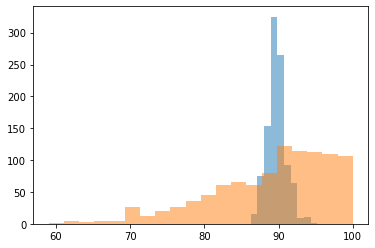

In [441]:
plt.hist(y_predict,bins=10,alpha=0.5)
plt.hist(y_test,bins=20,alpha=0.5)
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0.5, 0, 'Average Review (out of 5 stars)')

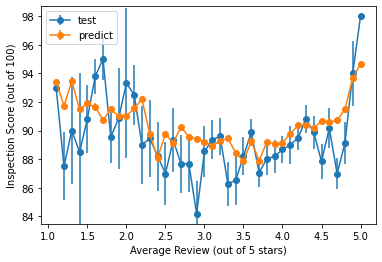

In [443]:
df_test = X_test.copy()
df_test['Score'] = y_test
df_test = plot_score_by_stars(df_test) # test data
df_predict = X_test.copy()
df_predict['Score'] = y_predict
df_predict = plot_score_by_stars(df_predict) # predictions

plt.errorbar(x=df_test.index,
             y=df_test.mean_Score,
             yerr=df_test.err_Score,
             marker='o')
plt.errorbar(x=df_predict.index,
             y=df_predict.mean_Score,
             yerr=df_predict.err_Score,
             marker='o')
plt.legend(['test','predict'])
plt.ylabel('Inspection Score (out of 100)')
plt.xlabel('Average Review (out of 5 stars)')

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0.5, 0, 'Average Review (out of 5 stars)')

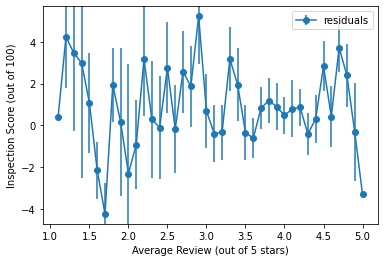

In [444]:
df_resid = X_test.copy()
df_resid['Score'] = y_predict - y_test
df_resid = plot_score_by_stars(df_resid) # predictions

plt.errorbar(x=df_resid.index,
             y=df_resid.mean_Score,
             yerr=df_resid.err_Score,
             marker='o')
plt.legend(['residuals'])
plt.ylabel('Inspection Score (out of 100)')
plt.xlabel('Average Review (out of 5 stars)')

<ErrorbarContainer object of 3 artists>

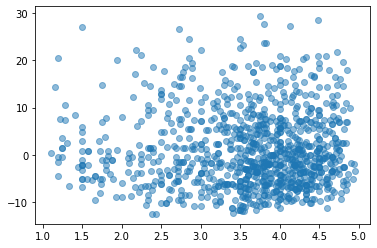

In [445]:
df_resid=pd.DataFrame({'stars':X_test['avg_review'],'resid':y_predict-y_test})
df_resid=df_resid.sort_values(by='stars')
plt.errorbar(df_resid.stars,df_resid.resid,fmt='o',alpha=0.5)

(array([ 29.,  61.,  97., 112., 126., 115., 100.,  64.,  66.,  69.,  39.,
         35.,  26.,  21.,  23.,  14.,   5.,   5.,   3.,   3.]),
 array([-12.45369462, -10.36727744,  -8.28086026,  -6.19444308,
         -4.1080259 ,  -2.02160872,   0.06480846,   2.15122564,
          4.23764282,   6.32406   ,   8.41047718,  10.49689436,
         12.58331154,  14.66972872,  16.7561459 ,  18.84256308,
         20.92898026,  23.01539744,  25.10181462,  27.1882318 ,
         29.27464898]),
 <BarContainer object of 20 artists>)

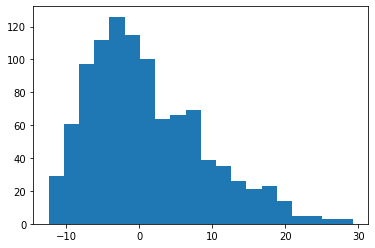

In [446]:
plt.hist(df_resid.resid,bins=20)

In [190]:
y_test

501     90.0
3751    94.0
2194    89.0
6360    84.0
6094    91.0
        ... 
3008    85.0
2167    90.0
5388    88.0
3837    75.0
3078    74.0
Name: Score, Length: 1318, dtype: float64

In [ ]:
score_by_stars = business_df.groupby('stars').agg(
    mean_Score=('Score', 'mean'),
    err_Score=('Score', 'sem'),
)
plt.errorbar(x=score_by_stars.index,
             y=score_by_stars.mean_Score,
             yerr=score_by_stars.err_Score,
             marker='o')
plt.ylabel('Inspection Score (out of 100)')
plt.xlabel('Average Review (out of 5 stars)')

In [ ]:
score_by_stars = business_df.groupby('stars').agg(
    mean_Score=('Score', 'mean'),
    err_Score=('Score', 'sem'),
)
plt.errorbar(x=score_by_stars.index,
             y=score_by_stars.mean_Score,
             yerr=score_by_stars.err_Score,
             marker='o')
plt.ylabel('Inspection Score (out of 100)')
plt.xlabel('Average Review (out of 5 stars)')

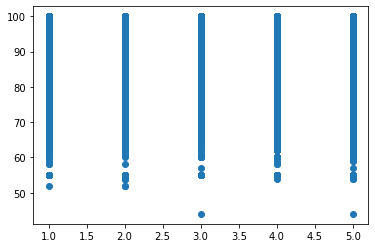

In [53]:
plt.scatter(df.review_stars, df.Score)

In [436]:
df.groupby(['business_id','Score']) \
.agg({'review_stars':'mean','stars':'mean'}).reset_index()

,business_id,Score,review_stars,stars
0,-0TbQsmE2p1bhG30rgvK2Q,93.0,3.571429,4.0
1,-0TbQsmE2p1bhG30rgvK2Q,95.0,5.000000,4.0
2,-0TbQsmE2p1bhG30rgvK2Q,98.0,5.000000,4.0
3,-4bP1UUgpZumIu6DZMaMzw,86.0,3.783333,4.0
4,-4bP1UUgpZumIu6DZMaMzw,95.0,3.800000,4.0
...,...,...,...,...
6583,zo-POOSRX0wiVJlJyvujyA,100.0,4.194444,4.0
6584,zr40jIjFDIcZ3dzbSK53Ww,84.0,3.600000,3.5
6585,zr40jIjFDIcZ3dzbSK53Ww,93.0,3.178571,3.5
6586,zubXuwlAEbvZd-MiLOgofQ,100.0,4.593407,4.5
